<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        BIKE SHARING DEMAND IN LONDON
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> EDA and Prediction </font></h2> 

---
    
<p align="right">
  Duygu Jones | Data Scientist  | May 2024 
    <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>


## Table of Contents

1. <a href='#introduction'>Introduction</a>
2. <a href='#eda'>Exploratory Data Analysis (EDA)</a>
   - <a href='#import'>Import and Read the Dataset</a>
   - <a href='#read'>Read the Dataset</a>
   - <a href='#understanding'>Understanding the Data</a>
3. <a href='#fe'>Feature Engineering</a>
   - <a href='#rename'>Rename the Columns</a>
   - <a href='#datetime'>Date-Time Transformations</a>
   - <a href='#extract'>Extract new columns</a>
4. <a href='#visualization'>Data Visualization</a>
   - <a href='#dist'>Distribution of total bike count</a>
   - <a href='#time'>Distribution of Bike Shares Over the Time</a>
   - <a href='#weather'>Temperature and Weather Conditions</a>
   - <a href='#conditions'>Bike Shares vs. Weather Conditions</a>
5. <a href='#selection'>Feature Selection</a>
   - <a href='#scaling'>Scaling numerical features</a>
   - <a href='#correlation'>Correlation Matrix</a>
6. <a href='#model'>Model Training and Evaluation</a>
   - <a href='#split'>Splitting the Data</a>
   - <a href='#train'>Train the Model</a>
   - <a href='#predict'>Make Predictions</a>
   - <a href='#evaluate'>Evaluate the Model</a>
   - <a href='#visualize'>Visualize the Performance</a>
7. <a href='#conclusion'>Conclusions</a>

<a id='introduction'></a>
<h3 align="left"><font color=#20a0ff>Introduction</font></h3>   

![](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExcGo0YWgwa3pjazJpZGdxNWVnYmFkanJjMjVhYTFjZTFjNjhkZXh2dSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/xT0GqrJNbZkRcr2Jgc/200.gif)

- This project aims to analyze and predict bike-sharing demand using historical data.
- By examining factors such as seasonality, weather conditions, and time of day, we developed a predictive model to forecast bike share counts. 
- The insights gained from this analysis can help optimize bike-sharing operations, ensuring better resource allocation and improved user satisfaction.
    
    
<h4 align="left"><font color=#20a0ff>Objectives</font></h4>      
    
1. **Analyze Bike Sharing Patterns**: Understand seasonal, daily, and hourly trends in bike sharing usage.
2. **Assess Impact of External Factors**: Evaluate how weather conditions, holidays, and weekends affect bike sharing demand.
3. **Feature Engineering**: Develop and transform features to improve model accuracy.
4. **Build Predictive Model**: Train a Random Forest model to predict bike share counts.
5. **Evaluate Model Performance**: Use performance metrics and visualizations to assess model accuracy.
6. **Provide Actionable Insights**: Recommend optimising bike sharing operations based on analysis findings.
   
    
<h4 align="left"><font color=#20a0ff>About the Datasets </font></h4>    
 
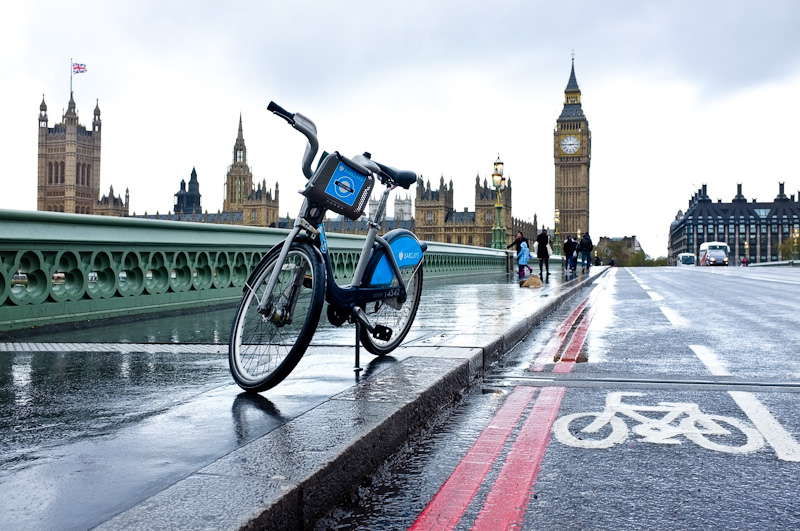    
    
- **Dataset:** 'store.sharing.csv'
- **Content:** The change in the number of bike shares in London according to seasons, temperature, wind speed, etc.
- **Rows:** 17414    
- **Columns:** 10 

INPUT:

**- ``timestamp``** - timestamp field for grouping the data<br>
**- ``cnt``** - the count of a new bike shares<br>
**- ``t1``** - real temperature in C<br>
**- ``t2``** - temperature in C “feels like”<br>
**- ``hum``** - humidity in percentage<br>
**- ``wind_speed``** - wind speed in km/h<br>
**- ``weather_code``** - category of the weather<br>
**- ``is_holiday``** - boolean field - 1 holiday / 0 non holiday<br>
**- ``is_weekend``** - boolean field - 1 if the day is weekend<br>
**- ``season``** - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>
​
**"weather_code" category description:**<br>
**``1``** = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br> 
**``2``** = scattered clouds / few clouds<br> 
**``3``** = Broken clouds<br> 
**``4``** = Cloudy<br> 
**``7``** = Rain/ light Rain shower/ Light rain<br> 
**``10``** = rain with thunderstorm<br> 
**``26``** = snowfall<br> 
**``94``** = Freezing Fog<br>

<a id='eda'></a>
## <font color=#20a0ff> <b>  Exploratory Data Analysis (EDA)</b><font color='orange'>

<a id='import'></a>
### Import and Read the Dataset

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl  
import matplotlib.pyplot as plt 
import seaborn as sns  
import missingno as mn
%matplotlib inline 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df0 = pd.read_csv('store_sharing.csv')
df = df0.copy()

In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<a id='understanding'></a>
### Understanding the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [9]:
# Basic statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [5]:
# Check out the duplicated values

duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print("\nNumber of duplicate rows:", duplicate_rows)
    print("Duplicate Rows:")
    print(df[df.duplicated()])
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [6]:
# Check out the missing values

df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<a id='fe'></a>
## <font color=#20a0ff> <b> Feature Engineering </b><font color='orange'>

<a id='rename'></a>
### Rename the Columns

In [5]:
df.rename(columns={'cnt':'total_count', 't1':'temp', 't2':'feel_temp', 'hum':'humidity'}, inplace=True)
df.columns

Index(['timestamp', 'total_count', 'temp', 'feel_temp', 'humidity',
       'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

<a id='datetime'></a>
### Date-Time Transformations

In [6]:
#convert the 'timestamp' column to a datetime format

df.timestamp = pd.to_datetime(df.timestamp)

<a id='extract'></a>
### Extract new columns (day of the week, day of the month, hour, month, season, year etc.)**

In [7]:
df['year'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.year
df['month'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.month
df['day'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.day
df['day_of_week'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.dayofweek
df['hour'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y').dt.hour

In [8]:
df.head()

,timestamp,total_count,temp,feel_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   total_count   17414 non-null  int64         
 2   temp          17414 non-null  float64       
 3   feel_temp     17414 non-null  float64       
 4   humidity      17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day           17414 non-null  int64         
 13  day_of_week   17414 non-null  int64         
 14  hour          17414 non-null  int64         
dtypes: datetime64[ns](1), float64(8), in

<a id='visualization'></a>
## <font color=#20a0ff> <b> Data Visualisation </b><font color='orange'>

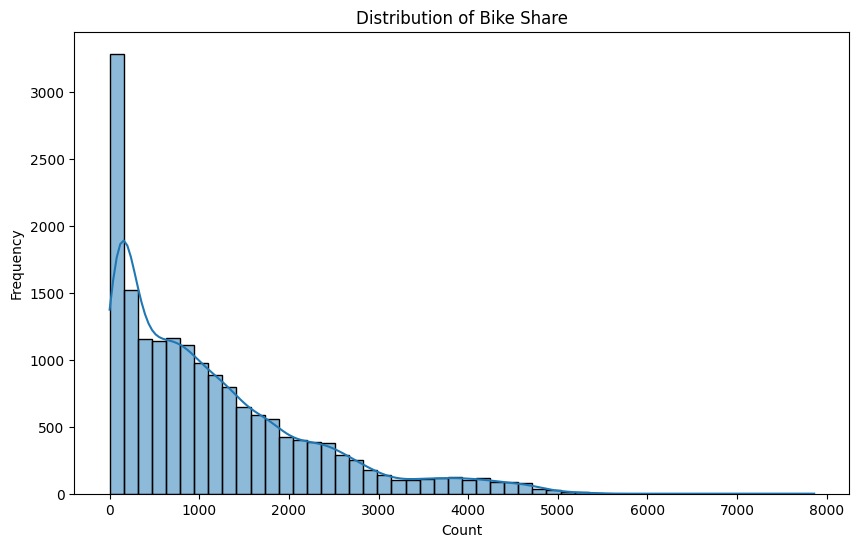

In [10]:
# Distribution of total bike count 
plt.figure(figsize=(10, 6)) 
sns.histplot(df['total_count'], bins=50, kde=True) 
plt.title('Distribution of Bike Share') 
plt.xlabel('Count') 
plt.ylabel('Frequency') 
plt.show()

<font color=dodgerblue> 💡 Output:  Histogram of Bike Share Distribution</font>  

The histogram shows the distribution of bike share counts.

- **Right-Skewed Distribution**: The distribution is heavily right-skewed, indicating that most bike share counts are low, with a significant peak at very low values. This suggests that there are many instances of low bike share usage and fewer instances of high usage.

 <a id='dist'></a>
 ### Distribution of Bike Shares Over the Time


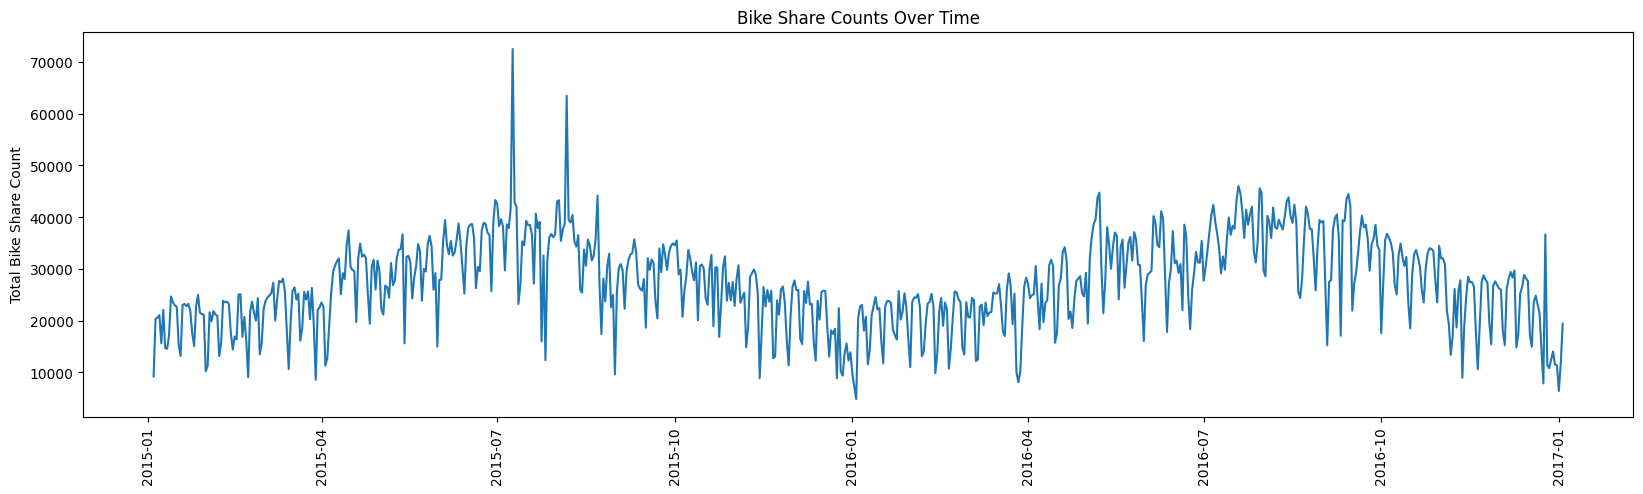

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date

df_sum = pd.DataFrame(df.groupby("timestamp")['total_count'].sum())


plt.figure(figsize=(20,5))
sns.lineplot(x="timestamp",y="total_count", data = df_sum);

plt.xlabel("")
plt.ylabel("Total Bike Share Count")
plt.title("Bike Share Counts Over Time")

plt.xticks(rotation=90);

 #### Bike shares count by years 

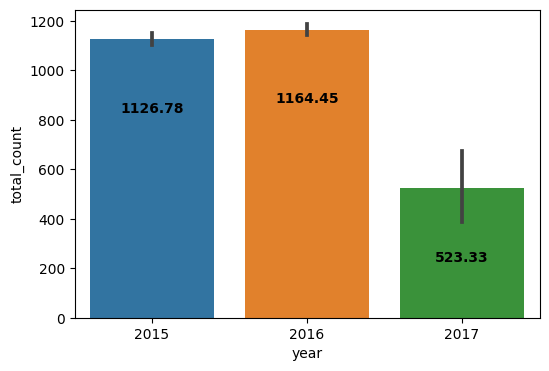

In [18]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=df, x="year", y="total_count")
for p in ax.patches:
    ax.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0,-50), textcoords='offset points',fontweight='bold')

<font color=dodgerblue> 💡 Output:Plot bike shares by years </font>  

- The average bike shares were highest in 2016, followed by 2015, with a significant drop in 2017. This suggests a peak in bike sharing activity in 2016, followed by a sharp decline the next year.

 #### Bike share count by months 

In [19]:
df_sum_2 = pd.DataFrame(df.groupby("month").total_count.sum())

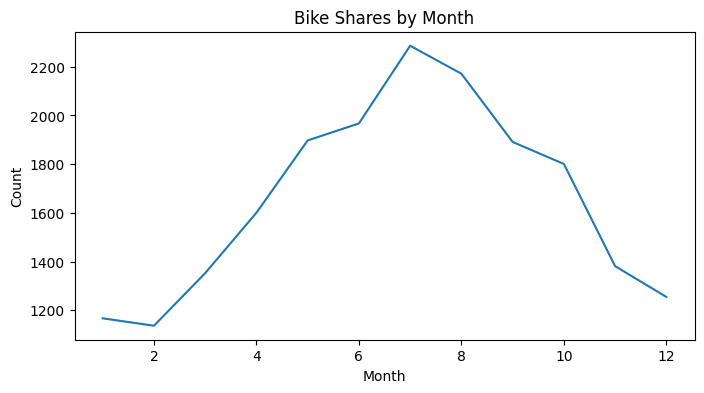

In [20]:
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x/1000)}'

plt.figure(figsize=(8,4))
ax = sns.lineplot(x="month", y="total_count", data=df_sum_2)

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Bike Shares by Month")
plt.show()


<font color=dodgerblue> 💡 Output: Bike shares over time by year-month (lineplot).</font>  
    
- The data shows seasonal peaks in bike shares during summer (June to August) and declines in winter (December to February). 
- Bike shares increased slightly from 2015 to 2016 but dropped significantly at the beginning of 2017, likely due to external factors or incomplete data. 
- Overall, bike sharing is influenced by warmer weather, with higher usage in summer.

#### Bike shares count by season

- **According to the provided graph showing the maximum and minimum bike shares by season, which season had the highest number of bike shares?**

In [21]:
df.groupby("season")["total_count"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,5322,0,1103.831589
1.0,7860,12,1464.465238
2.0,5422,9,1178.954218
3.0,4415,10,821.729099


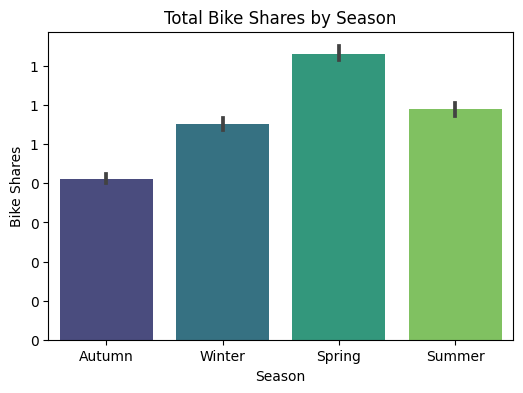

In [22]:
# Plotting bike sharing by season as a bar chart

season_labels = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}

plt.figure(figsize=(6,4))
sns.barplot(x=df['season'].replace(season_labels), y='total_count', data=df, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Bike Shares')
plt.title('Total Bike Shares by Season')

# y-axis labels
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label/1000)}' for label in y_labels])

plt.show()

<font color=dodgerblue> 💡 Output: Total Bike Shares by Season </font>  

- Bike shares are highest in the spring season, followed by summer and winter, with autumn having the lowest bike share counts. This suggests that more favorable weather conditions in spring and summer encourage higher bike usage compared to autumn and winter.

 #### Bike share count by weekdays for seasons

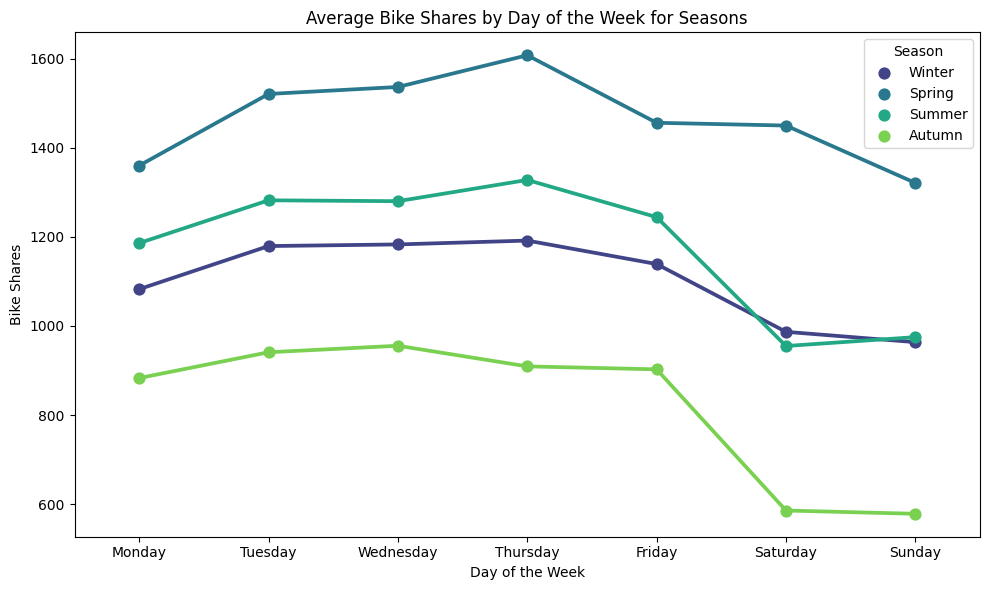

In [23]:
# Define the season and day of the week labels
season_labels = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregating the data by season and day of the week
daily_seasonal_data = df.groupby(['season', 'day_of_week'])['total_count'].mean().reset_index()

# Creating the point plot without adding a new column
plt.figure(figsize=(10,6))
sns.pointplot(x='day_of_week', y='total_count', hue=daily_seasonal_data['season'].replace(season_labels), data=daily_seasonal_data, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares')
plt.title('Average Bike Shares by Day of the Week for Seasons')

# Update the x-axis labels to show the days of the week
plt.xticks(ticks=range(7), labels=day_labels)

plt.legend(title='Season')
plt.tight_layout()
plt.show()

<font color=dodgerblue> 💡 Output:Average Bike Shares by Day of the Week for Seasons.</font>  

- **Weekday Peaks**: Highest bike shares on weekdays, especially Wednesday to Friday.
- **Weekend Drop**: Significant decrease in bike shares on Saturday and Sunday.
- **Seasonal Variation**: Summer and Spring have the highest bike shares; Winter has the lowest.
- **Consistent Trend**: Similar patterns across all seasons with higher usage on weekdays and lower on weekends.

 #### Bike shares count by hours

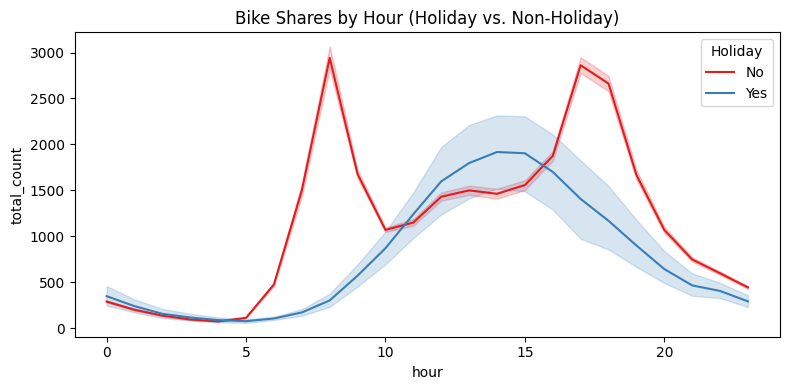

In [24]:
# Plotting
plt.figure(figsize=(8,4))

# Plot for is_holiday
sns.lineplot(data=df, x="hour", y="total_count", hue="is_holiday", palette="Set1")
plt.title("Bike Shares by Hour (Holiday vs. Non-Holiday)")

# Adjust legend to match line colors
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["No", "Yes"], title="Holiday")

plt.tight_layout()
plt.show()

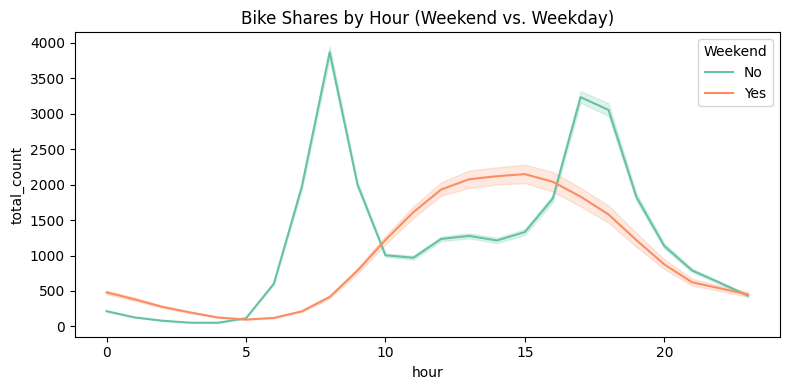

In [25]:
# Plotting
plt.figure(figsize=(8,4))

# Plot for is_weekend
sns.lineplot(data=df, x="hour", y="total_count", hue="is_weekend", palette="Set2")
plt.title("Bike Shares by Hour (Weekend vs. Weekday)")

# Adjust legend to match line colors
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["No", "Yes"], title="Weekend")

plt.tight_layout()
plt.show()

<font color=dodgerblue> 💡 Output: Bike shares by hours on (holidays, weekend). </font>  

- **Morning and Evening Peaks**: Bike shares peak around 8 AM and 5 PM, indicating high usage during commute hours.
- **Weekdays vs. Weekends**: Weekdays have higher bike shares in the morning and evening compared to weekends.
- **Holidays**: Bike shares are lower on holidays compared to non-holidays.

#### Distribution of bike shares by holidays and weekends

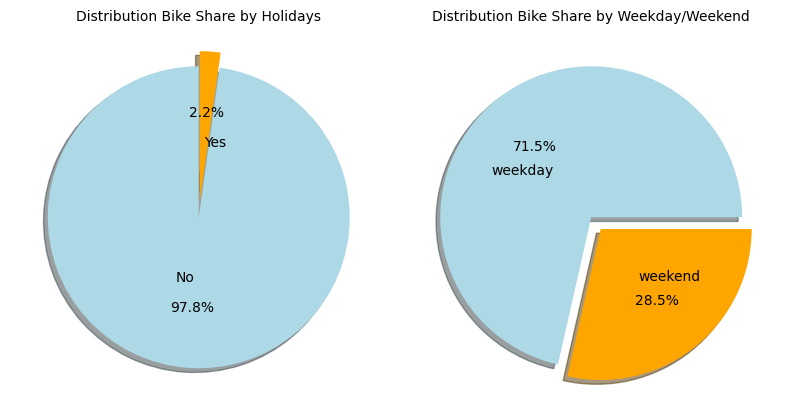

In [26]:
# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Colors and explode settings for the pie charts
colors_list = ["lightblue", "orange"]
explode_list = [0, 0.1]

# Pie chart for is_holiday
ax[0].pie(df['is_holiday'].value_counts().values,
          labels=["No", "Yes"],
          labeldistance=0.4,
          autopct="%.1f%%", shadow=True, 
          colors=colors_list, explode=explode_list,
          startangle=90)
ax[0].set_title("Distribution Bike Share by Holidays", fontsize=10)

# Pie chart for is_weekend
ax[1].pie(df['is_weekend'].value_counts().values,
          labels=["weekday", "weekend"],
          labeldistance=0.4,
          autopct="%.1f%%", shadow=True, 
          colors=colors_list, explode=explode_list)
ax[1].set_title("Distribution Bike Share by Weekday/Weekend", fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<font color=dodgerblue> 💡 Output: Distribution of Bike Shares by Holiday and Weekend </font>  

**Weekend**:
- The pie chart shows that bike shares are significantly higher on weekdays, making up 71.5% of the total usage.
- On weekends, bike shares account for only 28.5% of the total usage.
- This suggests that people predominantly use bike shares for commuting purposes during the workweek rather than for leisure or other activities on weekends.

**Holiday**:
- Non-Holiday Usage: The vast majority of bike shares (97.8%) occur on non-holidays.
- Holiday Usage: Only a small fraction (2.2%) of bike shares occur on holidays

 <a id='weather'></a>
 ### Temperature and Weather Conditions

#### Overview of the Weather in London

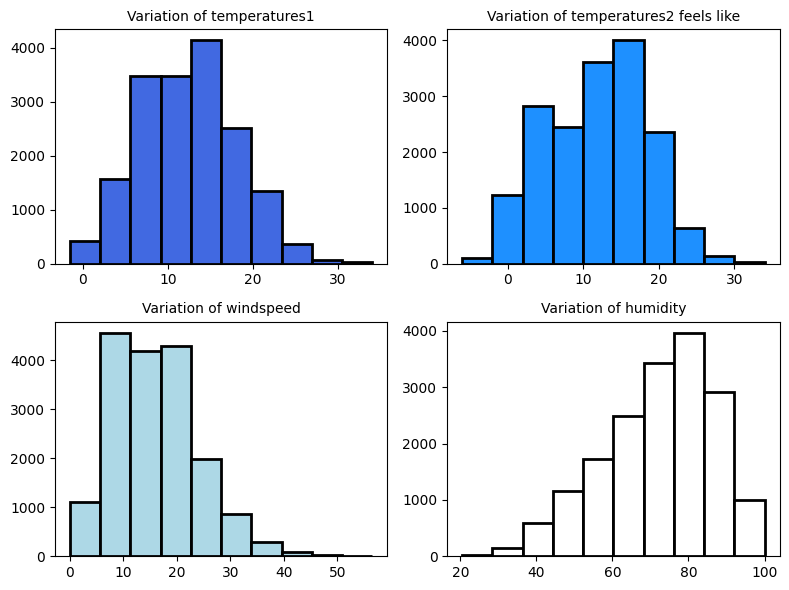

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

# Histogram for t1
axes[0, 0].hist(x="temp", data=df, edgecolor="black", linewidth=2, color='royalblue')
axes[0, 0].set_title("Variation of temperatures1", fontsize=10)

# Histogram for t2
axes[0, 1].hist(x="feel_temp", data=df, edgecolor="black", linewidth=2, color='dodgerblue')
axes[0, 1].set_title("Variation of temperatures2 feels like", fontsize=10)

# Histogram for wind speed
axes[1, 0].hist(x="wind_speed", data=df, edgecolor="black", linewidth=2, color='lightblue')
axes[1, 0].set_title("Variation of windspeed", fontsize=10)

# Histogram for humidity
axes[1, 1].hist(x="humidity", data=df, edgecolor="black", linewidth=2, color='white')
axes[1, 1].set_title("Variation of humidity", fontsize=10)

plt.tight_layout()
plt.show()


<font color=dodgerblue> 💡 Output: </font>  
 
-  Temperature frequency peaks around 15 degrees Celsius.
-  Feels-like temperature frequency is highest around 15 degrees Celsius.
-  Wind speed frequency is highest in the 5-10 km/h range.
-  Humidity frequency increases up to 80% and then decreases.

<a id='weather'></a>
#### Bike Shares vs. Weather Conditions

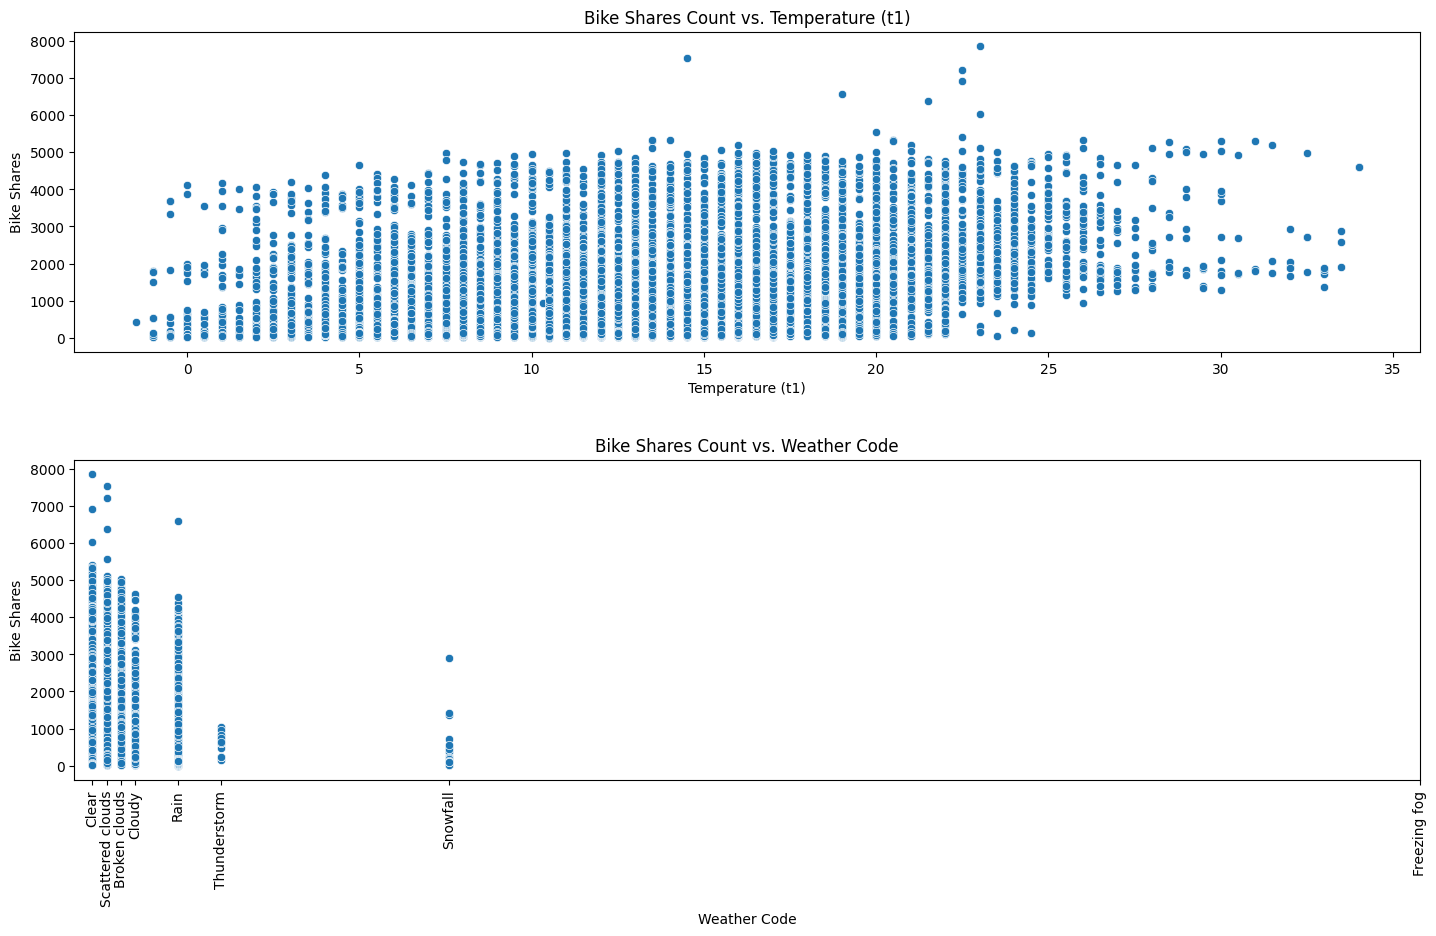

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Scatter plot for temp vs. total_count without season hue
sns.scatterplot(x="temp", y="total_count", data=df, ax=ax[0], palette="coolwarm")
ax[0].set_title("Bike Shares Count vs. Temperature (t1)")
ax[0].set_xlabel("Temperature (t1)")
ax[0].set_ylabel("Bike Shares")

# Scatter plot for weather_code vs. total_count without season hue
sns.scatterplot(x="weather_code", y="total_count", data=df, ax=ax[1], palette="coolwarm")
ax[1].set_title("Bike Shares Count vs. Weather Code")
ax[1].set_xlabel("Weather Code")
ax[1].set_ylabel("Bike Shares")

# Labels for weather codes
weather_code_labels = {
    1: 'Clear',
    2: 'Scattered clouds',
    3: 'Broken clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing fog'
}

# Increase space between x-ticks and add labels
ax[1].set_xticks(list(weather_code_labels.keys()))
ax[1].set_xticklabels(list(weather_code_labels.values()), rotation=90, ha='center', fontsize=10)

# Adjust spacing
plt.tight_layout(pad=3.0)

plt.show()

<font color=dodgerblue> 💡 Output: </font>  

1. **Bike Shares vs. Temperature (t1)**:
   - Bike shares tend to increase with temperature, with the highest bike share counts occurring around 15-25 degrees Celsius.

2. **Bike Shares vs. Weather Code**:
   - The highest bike shares occur during clear and scattered clouds weather conditions, while bike shares significantly drop during snowfall and freezing fog.

<a id='selection'></a>
## <font color=#20a0ff> <b> Feature Selection </b><font color='orange'>

<a id='scaling'></a>
### Scaling numerical features

In [11]:
# Scaling numerical features using the `StandardScaler()` function.

from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding 'timestamp' and categorical features)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features
df_scaled = scaler.fit_transform(df[numerical_features])

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

# Verify the scaling result
print(df_scaled.head())

   total_count      temp  feel_temp  humidity  wind_speed  weather_code  \
0    -0.885745 -1.699331  -1.439290  1.444517   -1.255717      0.118427   
1    -0.926295 -1.699331  -1.363703  1.444517   -1.382390     -0.735874   
2    -0.929982 -1.789071  -1.363703  1.689054   -2.015755     -0.735874   
3    -0.987120 -1.878811  -1.439290  1.933590   -2.015755     -0.735874   
4    -1.010160 -1.878811  -1.741635  1.444517   -1.192381     -0.735874   

   is_holiday  is_weekend    season      year     month       day  \
0   -0.150161    1.582347  1.347711 -0.999346 -1.597332 -1.336447   
1   -0.150161    1.582347  1.347711 -0.999346 -1.597332 -1.336447   
2   -0.150161    1.582347  1.347711 -0.999346 -1.597332 -1.336447   
3   -0.150161    1.582347  1.347711 -0.999346 -1.597332 -1.336447   
4   -0.150161    1.582347  1.347711 -0.999346 -1.597332 -1.336447   

   day_of_week      hour  
0     1.500672 -1.664802  
1     1.500672 -1.520204  
2     1.500672 -1.375605  
3     1.500672 -1.231007  

<a id='correlation'></a>
### Correlation Matrix 

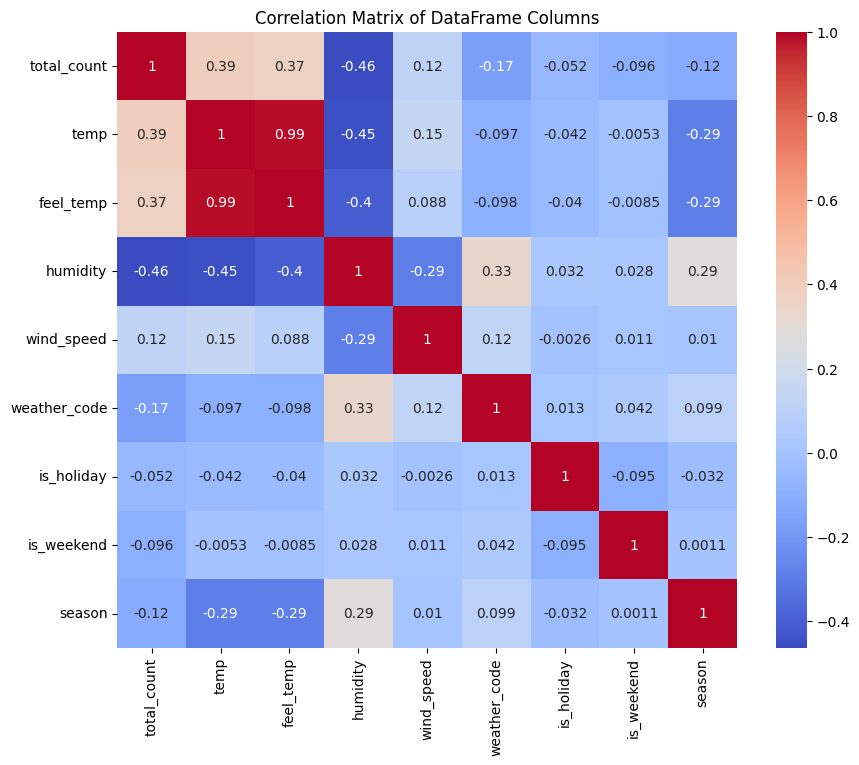

In [30]:
# Correlation Matrix 
correlation_matrix = df_scaled.iloc[:,0:9].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of DataFrame Columns')
plt.show()

<font color=dodgerblue> 💡 Output:  Correlation with the Heatmap.</font>  

1. **Bike Shares Count and Temperatures**:
   - There is a moderate positive correlation between `Count` and `temp` (0.39) and `Count` and `feel_temp` (0.37). This suggests that bike shares increase as temperatures rise.

2. **Bike Shares Count and Humidity**:
   - There is a moderate negative correlation between `Count` and `humidity` (-0.46), indicating that higher humidity levels are associated with fewer bike shares.

3. **Humidity and Weather Code**:
   - Humidity has a moderate positive correlation with the weather code (0.33), suggesting that certain weather conditions, like rain or fog, are associated with higher humidity levels. 

6. **Temperatures and Humidity**:
   - There is a moderate negative correlation between temperature (temp, feel_temp) and humidity (-0.45 and -0.4 respectively), indicating that higher temperatures are generally associated with lower humidity.

### Negatife and Positive Correlations of Bike Share(cnt) vs other Columns

<Figure size 1200x800 with 0 Axes>

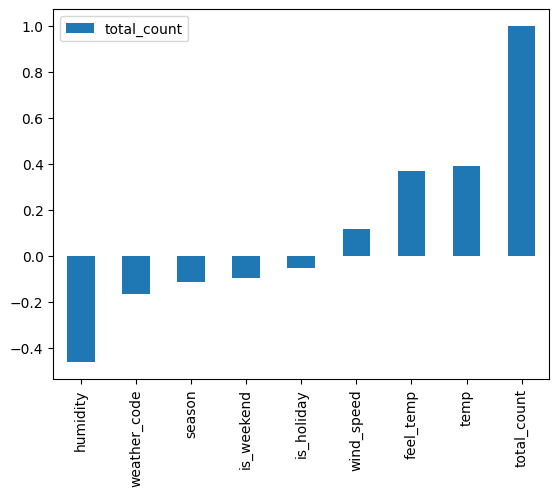

In [31]:
plt.figure(figsize=(12,8))

df_scaled.iloc[:,0:9].corr()[["total_count"]].sort_values(by="total_count").plot.bar();

<font color=dodgerblue> 💡 Output:  Correlation of Bike Share count vs other Columns</font>  
 
    
1. **Positive Correlations with Bike Shares (cnt)**:
   - **Temperature (t1)**: Moderate positive correlation (0.39) suggests that bike shares increase as the real temperature rises.
   - **Feels-like Temperature (t2)**: Moderate positive correlation (0.37) suggests that bike shares increase as the feels-like temperature rises.
   - **Wind Speed**: Weak positive correlation (0.12) indicates a slight increase in bike shares with higher wind speeds.

2. **Negative Correlations with Bike Shares (cnt)**:
   - **Humidity (hum)**: Moderate negative correlation (-0.46) indicates that bike shares decrease as humidity increases.
   - **Weather Code**: Weak negative correlation (-0.17) suggests that adverse weather conditions slightly reduce bike shares.
   - **Season**: Weak negative correlation (-0.12) indicates that bike shares are somewhat lower in certain seasons.
   - **Weekend (is_weekend)**: Weak negative correlation (-0.096) indicates fewer bike shares on weekends.
   - **Holiday (is_holiday)**: Very weak negative correlation (-0.052) suggests slightly fewer bike shares on holidays.

<a id='model'></a>
## <font color=#20a0ff> <b> Model Training and Evaluation </b><font color='orange'>  

<a id='split'></a>
### Splitting the Data

- We will assign all the independent variables to X, and the dependent variable, 'total_count', to Y.
- Then split the dataset into training and test sets to build and evaluate our machine learning model.

In [12]:
X = df.drop(['total_count','timestamp'], axis=1) # features
y = df['total_count']  # target

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          17414 non-null  float64
 1   feel_temp     17414 non-null  float64
 2   humidity      17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
 7   season        17414 non-null  float64
 8   year          17414 non-null  int64  
 9   month         17414 non-null  int64  
 10  day           17414 non-null  int64  
 11  day_of_week   17414 non-null  int64  
 12  hour          17414 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.7 MB


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_size=0.2: Veri kümesinin %20'si test seti olarak ayrılacak anlamına gelir. Geri kalan %80'i eğitim seti olarak kullanılır.

random_state=42: Rastgelelik için sabit bir başlangıç noktası belirler. Aynı kod tekrar çalıştırıldığında aynı sonuçları almayı sağlar. Bu, modelin tekrarlanabilirliği ve sonuçların tutarlılığı için önemlidir.

Eğitim seti (train set) modelin eğitildiği verilerdir. Test seti ise modelin performansını değerlendirmek için kullanılan veri kümesidir. Model, test setindeki verileri daha önce görmediği için, bu ayrım modelin genelleme yeteneğini ölçmeye yardımcı olur.

<a id='train'></a>
### Train the Model

- We will train a Random Forest model on the training data and use it to make predictions on the test data.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

RandomForestRegressor modelini başlatır.
n_estimators=100: Ormanda 100 adet karar ağacı olacağını belirtir. Bu, modelin karmaşıklığını ve doğruluğunu etkileyen önemli bir hiperparametredir.

fit metodu, modelin eğitim seti (X_train ve y_train) kullanılarak eğitilmesini sağlar.

<a id='predict'></a>
### Make Predictions

- We will evaluate the model using metrics such as Mean Squared Error and R^2 Score.

In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([  66.78, 1881.65,  236.19, ...,   51.94,  441.9 ,  180.49])

predict metodu, modelin test veri setindeki bağımsız değişkenlere (özellikler) dayanarak bağımlı değişkenleri (etiketleri) tahmin etmesini sağlar.

X_test: Test setindeki bağımsız değişkenler. Bu veri seti, modelin performansını değerlendirmek için kullanılan verileri içerir.
y_pred: Modelin X_test verilerine dayanarak yaptığı tahminleri içeren bir NumPy dizisidir.

<a id='evaluate'></a>
### Evaluate the Model

- We will evaluate the model using metrics such as Mean Squared Error and R^2 Score.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 45712.55271826012
R^2 Score: 0.9618503477665578


sklearn.metrics modülü, MSE ve R^ Bu fonksiyonlar modelin performansını değerlendirmek için kullanılır.

<a id='visualize'></a>
### Visualize the Performance

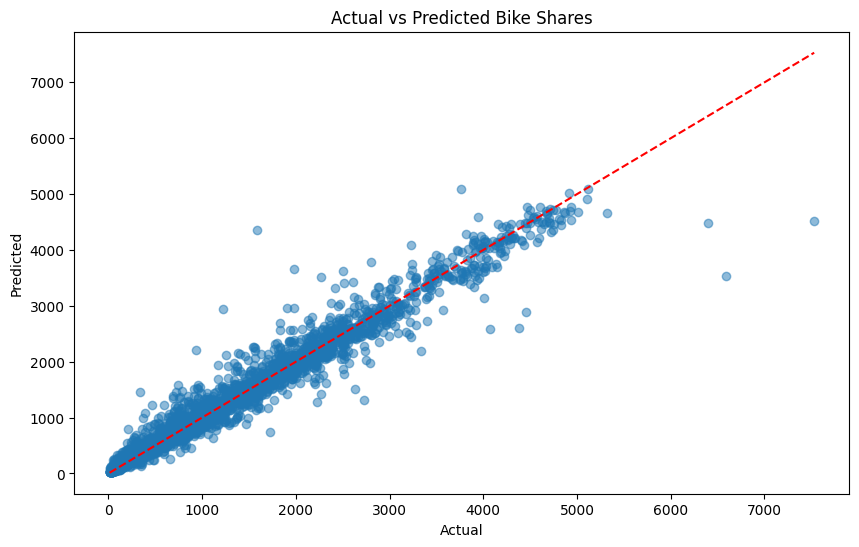

In [37]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bike Shares')
plt.show()

<font color=dodgerblue> 💡Scatter Plot: ompares the actual vs. predicted values. </font> 

- The red dashed line represents the ideal scenario where predictions perfectly match the actual values.
- The scatter plot shows a strong positive correlation between actual and predicted bike share counts, indicating good model performance. 
- However, the model is less accurate at predicting higher bike share counts, with more significant deviations observed at these values.

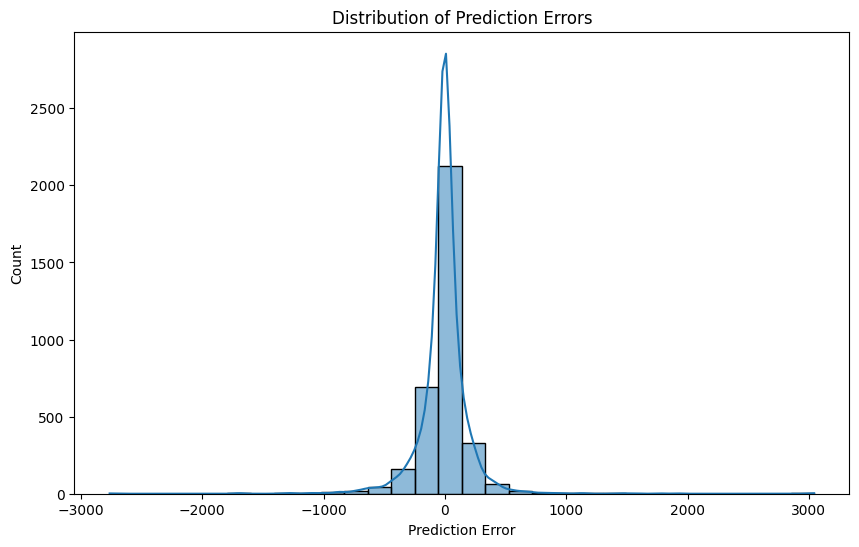

In [38]:
# Histogram: Distribution of prediction errors
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

<font color=dodgerblue> 💡Histogram </font> 

- The histogram shows the distribution of the prediction errors (differences between actual and predicted values).

- **Centered Around Zero**: The errors are tightly clustered around zero, indicating that the model's predictions are generally accurate.
- **Symmetrical Distribution**: The symmetrical shape suggests that the model's errors are evenly distributed, with no significant bias in overestimating or underestimating bike shares.

This indicates a well-performing model with minimal prediction errors.

<a id='conclusion'></a>
## <font color=dodgerblue> 💡CONCLUSİONS </font> 

### Key Insights:

1. **Seasonal and Weather Influence**: Bike sharing demand changes significantly with the seasons and weather and peak during summer months, indicating higher usage in warmer weather. This means bike share programs can plan and manage resources better by considering these factors.

2. **Commuting Patterns**: There are clear peaks in bike usage during morning and evening rush hours and between weekdays and weekends, as well as holidays. Weekends and holidays generally show lower bike share counts.This indicates that bike sharing is primarily used for commuting on regular weekdays. Improving infrastructure and services during these times can enhance the biking experience.

3. **Model Reliability**: The Random Forest model performs well in predicting bike share demand, making it a reliable tool for future demand forecasting and decision-making.


### Recommendations:

1. **Seasonal Planning**: Increase the number of available bikes during the summer when demand is high, and reduce it in the winter when fewer people are biking.

2. **Peak Hour Management**: Make sure there are more bikes available during peak commuting hours to meet the high demand and ensure users can find bikes when they need them.

3. **Weather-Dependent Strategies**: Develop strategies that adjust bike availability based on weather forecasts, ensuring bikes are available when conditions are favorable for biking.

### Overall Summary:

This analysis provides valuable insights into the factors affecting bike sharing demand, such as seasonal changes, weather conditions, and commuting patterns. The Random Forest model has proven effective in predicting future bike share demand, which can help in making strategic decisions to optimize bike sharing services. Implementing these recommendations can enhance user satisfaction and ensure the bike sharing program runs smoothly.

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<p align="right">
  Duygu Jones | Data Scientist  | May 2024
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>